# Exploratory Data Analysis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from loader import load_files, get_labels, load_data

In [4]:
# f = '../data/{fn}.sgm'
# load the first 5 files
# files = [f.format(fn='reut2-00'+str(i)) for i in range(7)]

# data = load_files(files)

data = load_data("../data/")

Loading ../data/reut2-008.sgm...
Loaded ../data/reut2-008.sgm.
Loading ../data/reut2-009.sgm...
Loaded ../data/reut2-009.sgm.
Loading ../data/reut2-010.sgm...
Loaded ../data/reut2-010.sgm.
Loading ../data/reut2-011.sgm...
Loaded ../data/reut2-011.sgm.
Loading ../data/reut2-012.sgm...
Loaded ../data/reut2-012.sgm.
Loading ../data/reut2-013.sgm...
Loaded ../data/reut2-013.sgm.
Loading ../data/reut2-014.sgm...
Loaded ../data/reut2-014.sgm.
Loading ../data/reut2-015.sgm...
Loaded ../data/reut2-015.sgm.
Loading ../data/reut2-016.sgm...
Loaded ../data/reut2-016.sgm.
Loading ../data/reut2-017.sgm...
Error reading file: ../data/reut2-017.sgm
Loaded ../data/reut2-017.sgm.
Loading ../data/reut2-018.sgm...
Loaded ../data/reut2-018.sgm.
Loading ../data/reut2-019.sgm...
Loaded ../data/reut2-019.sgm.
Loading ../data/reut2-020.sgm...
Loaded ../data/reut2-020.sgm.
Loading ../data/reut2-000.sgm...
Loaded ../data/reut2-000.sgm.
Loading ../data/reut2-001.sgm...
Loaded ../data/reut2-001.sgm.
Loading ../da

In [5]:
df = pd.DataFrame(data)

# drop rows where body is None
df = df[df['body'].notnull()]

df.head()

,title,body,topics,places,people,orgs,exchanges,companies
0,GANTOS INC GTOS 4TH QTR JAN 31 NET,Shr 43 cts vs 37 cts Net 2276000 vs 1674000 Re...,[earn],[usa],None,None,None,None
2,LDC FOOD AID NEEDS DECLINE IN 198687 USDA,Total food aid needs 69 least developed countr...,"[grain, wheat, oilseed, soybean, veg-oil]",[usa],None,None,None,None
3,US SUGAR PROGRAM CUT SENT TO CONGRESS BY USDA,The US Agriculture Department formally transmi...,"[sugar, grain, corn]",[usa],None,None,None,None
4,OE INC 4TH QTR NET,Shr 24 cts vs 26 cts Net 15 mln vs 13 mln Revs...,[earn],[canada],None,None,None,None
5,TEXAS INSTRUMENTS TXN BEGINS BUILDING PLANT,Texas Instruments Inc said construction begin ...,None,[usa],None,None,None,None


In [6]:
# get number of tokens with respect to BERT tokenizer
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

df['tokens'] = df['body'].apply(tokenizer.encode)
df['num_tokens'] = df['tokens'].apply(len)

df.head()

Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors


,title,body,topics,places,people,orgs,exchanges,companies,tokens,num_tokens
0,GANTOS INC GTOS 4TH QTR JAN 31 NET,Shr 43 cts vs 37 cts Net 2276000 vs 1674000 Re...,[earn],[usa],None,None,None,None,"[101, 156, 8167, 3887, 172, 2145, 5016, 3413, ...",85
2,LDC FOOD AID NEEDS DECLINE IN 198687 USDA,Total food aid needs 69 least developed countr...,"[grain, wheat, oilseed, soybean, veg-oil]",[usa],None,None,None,None,"[101, 8653, 2094, 4256, 2993, 5691, 1655, 1872...",151
3,US SUGAR PROGRAM CUT SENT TO CONGRESS BY USDA,The US Agriculture Department formally transmi...,"[sugar, grain, corn]",[usa],None,None,None,None,"[101, 1109, 1646, 8273, 1951, 5708, 12086, 275...",520
4,OE INC 4TH QTR NET,Shr 24 cts vs 26 cts Net 15 mln vs 13 mln Revs...,[earn],[canada],None,None,None,None,"[101, 156, 8167, 1572, 172, 2145, 5016, 1744, ...",72
5,TEXAS INSTRUMENTS TXN BEGINS BUILDING PLANT,Texas Instruments Inc said construction begin ...,None,[usa],None,None,None,None,"[101, 2245, 25832, 3561, 1163, 2058, 3295, 136...",71


In [7]:
print(df['num_tokens'].mean())
print(df['num_tokens'].median())
print(df['num_tokens'].std())
print(df['num_tokens'].max())
print(df['num_tokens'].min())

121.95260454068386
87.0
109.25442865578694
2976
4


In [8]:
# figure out what percentage of the data has more than 512 tokens
print(df['num_tokens'].apply(lambda x: x > 512).mean())

0.016461359995580842


In [9]:
# get number of rows where topics is not empty
topics = df['topics']

topics.dropna(inplace=True)

print(topics.shape)

(9814,)


Topics seem like an excellent candidate for classification. We would be solving a multi-class, multi-label intent recognition problem. Let's learn more about the topics.

### Distribution of Topics

(array([8.268e+03, 1.099e+03, 2.460e+02, 0.000e+00, 8.900e+01, 5.100e+01,
        2.800e+01, 0.000e+00, 1.100e+01, 6.000e+00, 6.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,
         7.75,  8.5 ,  9.25, 10.  , 10.75, 11.5 , 12.25, 13.  , 13.75,
        14.5 , 15.25, 16.  ]),
 <BarContainer object of 20 artists>)

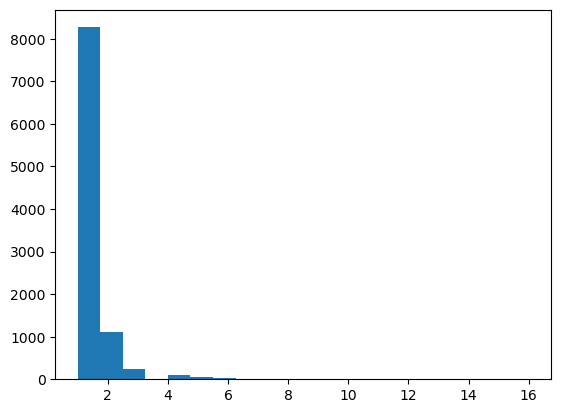

In [10]:
# get average number of topics per document
num_topics = topics.apply(lambda x: len(x))

plt.hist(num_topics, bins=20)

In [11]:
average_num_topics = num_topics.mean()
std_num_topics = num_topics.std()
median_num_topics = num_topics.median()
max_num_topics = num_topics.max()

print("Average number of topics per document: ", average_num_topics)
print("Standard deviation of number of topics per document: ", std_num_topics)
print("Median number of topics per document: ", median_num_topics)
print("Maximum number of topics per document: ", max_num_topics)
print("Minimum number of topics per document: ", num_topics.min())

Average number of topics per document:  1.2513755858976972
Standard deviation of number of topics per document:  0.7873229003354858
Median number of topics per document:  1.0
Maximum number of topics per document:  16
Minimum number of topics per document:  1


Now, let's see what the most popular topics are.

In [12]:
all_topics = get_labels('topics')

idx_to_topic = {i: all_topics[i] for i in range(len(all_topics))}
topic_to_idx = {all_topics[i]: i for i in range(len(all_topics))}

In [13]:
len(all_topics)

135

In [14]:
# get the frequency of each topic
topic_counts = {topic: 0 for topic in all_topics}

for doc_topics in topics:
    for topic in doc_topics:
        topic_counts[topic] += 1

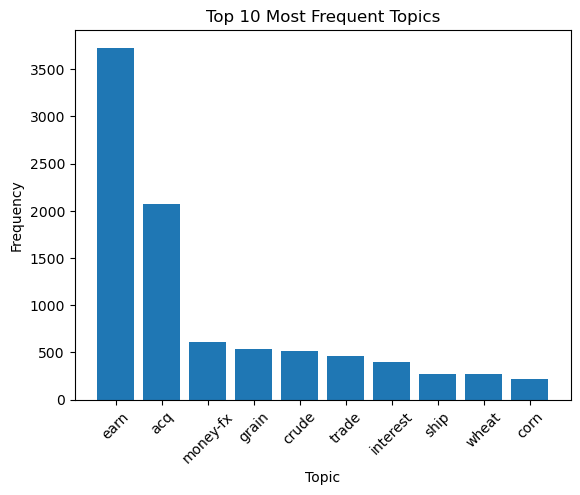

In [15]:
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)

plt.bar(range(10), [x[1] for x in sorted_topics[:10]])

plt.title('Top 10 Most Frequent Topics')
plt.ylabel('Frequency')
plt.xlabel('Topic')

plt.xticks(range(10), [x[0] for x in sorted_topics[:10]], rotation=45)

plt.show()